# Building deep learning models with keras
You'll use the Keras library to build deep learning models for classification. By the end of the chapter, you'll have all the tools necessary to build deep neural networks.

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

*This notebook is inspired by: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/*

## Table Of Contents
0. [Initial Set-Up for Google Colab](#initial-set-up-for-google-colab)
1. [Initial Set-Up (offline)](#initial-set-up-offline)
2. [Load Data](#Load-Data)
    - [The Dataset](#The-Dataset)
    - [Details](#Details)
3. [Define Keras Model](#Define-Keras-Model)
    - [Summarize model](#Summarize-Model)
    - [Visualize model](#Visualize-Model)
4. [Compile Keras Model](#Compile-Keras-Model)
5. [Fit Keras Model](#Fit-Keras-Model)
6. [Evaluate Keras Model](#Evaluate-Keras-Model)
    - [Visualize Model Training History](#Visualize-Model-Training-History-in-Keras)
7. [Save a Keras Model](#Save-a-Keras-Model)
8. [Load a Keras Model](#Load-a-Keras-Model)
9. [Make Predictions](#Make-Predictions)
10. [Changing Optimization Parameters](#Changing-Optimization-Parameters)
11. [Try Yourself](#Try-Yourself)

## Initial Set-Up for Google Colab
<u> Execute these code blocks just in Google Colab! </u>

In [11]:
!git clone https://github.com/University-Clinic-of-Neuroradiology/python-bootcamp.git

Cloning into 'python-bootcamp'...
Updating files:   0% (464/104292)
Updating files:   1% (1043/104292)
Updating files:   2% (2086/104292)
Updating files:   2% (2654/104292)
Updating files:   3% (3129/104292)
Updating files:   4% (4172/104292)
Updating files:   4% (4853/104292)
Updating files:   5% (5215/104292)
Updating files:   6% (6258/104292)
Updating files:   6% (7095/104292)
Updating files:   7% (7301/104292)
Updating files:   8% (8344/104292)
Updating files:   8% (9368/104292)
Updating files:   9% (9387/104292)
Updating files:  10% (10430/104292)
Updating files:  11% (11473/104292)
Updating files:  11% (11582/104292)
Updating files:  12% (12516/104292)
Updating files:  13% (13558/104292)
Updating files:  13% (13838/104292)
Updating files:  14% (14601/104292)
Updating files:  15% (15644/104292)
Updating files:  15% (16153/104292)
Updating files:  16% (16687/104292)
Updating files:  17% (17730/104292)
Updating files:  17% (18487/104292)
Updating files:  18% (18773/104292)
Updating 

In [13]:
import os
import sys
from google.colab import output
output.enable_custom_widget_manager()

sys.path.insert(0,'/content/python-bootcamp/notebooks/DeepLearning')
os.chdir(sys.path[0])

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%pip install -q ipympl numpy matplotlib tensorflow keras

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

## Initial Set-Up (offline)

In [15]:
# Make sure figures appears inline and animations works
# Edit this to ""%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

## --- Start notebook ---

The following function `format_and_render_plot()` is just a simplify formatting method for the plots in this notebook.

In [17]:
def format_and_render_plot():
    '''
    Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.
    '''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.legend(loc='center right')
    plt.show()

## Load Data
We will use the `NumPy` library to load the dataset and two classes from the Keras library to define the model.

### The Dataset
In this Keras tutorial, we will use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values and is an ideal choice for our first neural network in Keras.

The dataset is available here:

- [Dataset CSV File (pima-indians-diabetes.csv)](/notebooks/DeepLearning/Data/pima-indians-diabetes.csv)
- [Dataset Details](/notebooks/DeepLearning/Data/details_pima-indians-diabetes.txt)

In [18]:
data_path = 'Data/pima-indians-diabetes.csv'

# load the dataset
dataset = np.loadtxt(data_path, delimiter=',')
print(dataset)
print(np.shape(dataset))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
(768, 9)


### Details
There are eight input variables and one output variable (the last column). You will be learning a model to map rows of input variables (X) to an output variable (y), which is often summarized as *y = f(X)*.

The variables can be summarized as follows:

Input Variables (X):

- Number of times pregnant
- Plasma glucose concentration at 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)

Output Variables (y):

- Class variable (0 or 1)

Once the CSV file is loaded into memory, you can split the columns of data into input and output variables.

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g., [rows, columns].

You can split the array into two arrays by selecting subsets of columns using the standard NumPy slice operator or `:`. You can select the first eight columns from index 0 to index 7 via the slice 0:8. We can then select the output column (the 9th variable) via index 8.

In [19]:
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
print(y)
print(len(y))

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

## Define Keras Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the correct number of input features. This can be specified when creating the first layer with the `input_shape` argument and setting it to (8,) for presenting the eight input variables as a vector.

How do we know the number of layers and their types?

This is a tricky question. There are heuristics that you can use, and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.

In this example, let’s use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. You can specify the number of neurons or nodes in the layer as the first argument and the activation function using the activation argument.

Also, you will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. Using a sigmoid on the output layer ensures your network output is between 0 and 1 and is easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

You can piece it all together by adding each layer:

The model expects rows of data with 8 variables (the `input_shape=(8,)` argument).
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

In [20]:
# define the keras model
def get_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

### Summarize Model
Keras provides a way to summarize a model.

The summary is textual and includes information about:
- The layers and their order in the model.
- The output shape of each layer.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.
- The summary can be created by calling the `summary()` function on the model that returns a string that in turn can be printed.


In [21]:
model = get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


### Visualize Model
The summary is useful for simple models, but can be confusing for models that have multiple inputs or outputs.

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The `plot_model()` function in Keras will create a plot of your network. This function takes a few useful arguments:
- model: (required) The model that you wish to plot.
- to_file: (required) The name of the file to which to save the plot.
- show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
- show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.

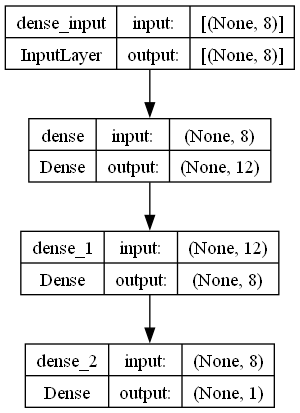

In [22]:
import graphviz
import pydot
plot_model(model, to_file='Images/model_plot.png', show_shapes=True, show_layer_names=True)

## Compile Keras Model

Now that the model is defined, you can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU, GPU, or even distributed.

When compiling, you must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in your dataset.

You must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network, and any optional metrics you want to collect and report during training.

In this case, use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

Finally, because it is a classification problem, you will collect and report the classification accuracy defined via the metrics argument.

In [24]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit Keras Model
ou have defined your model and compiled it to get ready for efficient computation.

Now it is time to execute the model on some data.

You can train or fit your model on your loaded data by calling the fit() function on the model.

Training occurs over epochs, and each epoch is split into batches.
- Epoch: One pass through all of the rows in the training dataset
- Batch: One or more samples considered by the model within an epoch before weights are updated

One epoch comprises one or more batches, based on the chosen batch size, and the model is fit for many epochs.

The training process will run for a fixed number of epochs (iterations) through the dataset that you must specify using the epochs argument. You must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size, and set using the `batch_size` argument.

This problem will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. You want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

In [25]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 899us/step - loss: 2.7854 - accuracy: 0.5990
Epoch 2/150
77/77 [==============================] - 0s 889us/step - loss: 1.5342 - accuracy: 0.6393
Epoch 3/150
77/77 [==============================] - 0s 882us/step - loss: 1.2094 - accuracy: 0.6302
Epoch 4/150
77/77 [==============================] - 0s 941us/step - loss: 0.9622 - accuracy: 0.6263
Epoch 5/150
77/77 [==============================] - 0s 875us/step - loss: 0.8658 - accuracy: 0.6315
Epoch 6/150
77/77 [==============================] - 0s 869us/step - loss: 0.7945 - accuracy: 0.6523
Epoch 7/150
77/77 [==============================] - 0s 941us/step - loss: 0.7435 - accuracy: 0.6354
Epoch 8/150
77/77 [==============================] - 0s 849us/step - loss: 0.7165 - accuracy: 0.6562
Epoch 9/150
77/77 [==============================] - 0s 913us/step - loss: 0.6776 - accuracy: 0.6549
Epoch 10/150
77/77 [==============================] - 0s 934us/step - loss: 0.6577 - accura

## Evaluate Keras Model
You have trained our neural network on the entire dataset, and you can evaluate the performance of the network on the same dataset.

This will only give you an idea of how well you have modeled the dataset (e.g., train accuracy), but no idea of how well the algorithm might perform on new data. This was done for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the `evaluate()` function and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The `evaluate()` function will return a list with two values. The first will be the loss of the model on the dataset, and the second will be the accuracy of the model on the dataset.

In [26]:
# evaluate the keras model
scores = model.evaluate(X, y)
print('Accuracy: %.2f' % (scores[1]))
print('Loss: %.2f' % (scores[0]))

24/24 [==============================] - 0s 802us/step - loss: 0.4675 - accuracy: 0.7852
Accuracy: 0.79
Loss: 0.47


### Visualize Model Training History in Keras
Keras provides the capability to register callbacks when training a deep learning model.

One of the default callbacks registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) and the loss and accuracy for the validation dataset if one is set.

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

The example collects the history returned from training the model and creates two charts:
- A plot of accuracy on the training and validation datasets over training epochs
- A plot of loss on the training and validation datasets over training epochs

*One more thing:*

With the `validation_split` option it is possible to split our data into two different datasets: one for training and the other for validation.

In [27]:
model = get_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


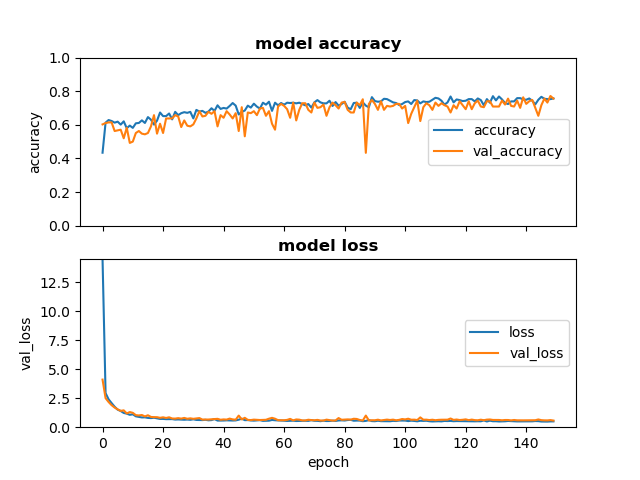

In [28]:
# summarize history for accuracy and loss
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(history.history['accuracy'], label='accuracy')
axes[0].plot(history.history['val_accuracy'], label='val_accuracy')
axes[0].set_title('model accuracy', fontweight ="bold")
axes[0].set_ylabel('accuracy')
axes[0].set_ylim([0, 1])

axes[1].plot(history.history['loss'], label='loss')
axes[1].plot(history.history['val_loss'], label='val_loss')
axes[1].set_title('model loss', fontweight ="bold")
axes[1].set_ylabel('val_loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylim([0, max(history.history['loss'])])
format_and_render_plot()

The plots can provide an indication of useful things about the training of the model, such as:
- Its speed of convergence over epochs (slope)
- Whether the model may have already converged (plateau of the line)
- Whether the mode may be over-learning the training data (inflection for validation line)

## Save a Keras Model
You can save your model by calling the save() function on the model and specifying the filename.

In [31]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


## Load a Keras Model
Your saved model can then be loaded later by calling the load_model() function and passing the filename. The function returns the model with the same architecture and weights.

In [32]:
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

# evaluate the model
score = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                108       
                                                                 
 dense_19 (Dense)            (None, 8)                 104       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 74.87%


## Make Predictions
The number one question I get asked is: *After I train my model, how can I use it to make predictions on new data?*

You can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset you have not seen before.

Making predictions is as easy as calling the `predict()` function on the model. You are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. You can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [33]:
# make probability predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 [==============================] - 0s 743us/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


## Changing Optimization Parameters
We'll now try optimizing a model at different learning rates. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

In [34]:
# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = Adam(learning_rate=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='binary_crossentropy')
    
    # Fit the model
    model.fit(X, y)



Testing model with learning rate: 0.000001

24/24 [==============================] - 0s 913us/step - loss: 44.6114


Testing model with learning rate: 0.010000

24/24 [==============================] - 0s 913us/step - loss: 3.4827


Testing model with learning rate: 1.000000

24/24 [==============================] - 0s 914us/step - loss: 8.1685


## Try Yourself
Tune the Model. Change the configuration of the model or training process and see if you can improve the performance of the model, e.g., achieve better than 76% accuracy.
Some hints:
- Add layers
- Find the optimal learning rate
- ...

In [35]:
# Write your code here

#https://machinelearningmastery.com/improve-deep-learning-performance/


